<img src="baner_01.jpg">
<center>

# **Анализ и обработка на данни с Python**


    
## **УниБИТ**

</center>
Лекциите са базирани на отвореният курс за машинно обучение [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course с автор : [Yury Kashnitskiy](https://yorko.github.io). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.


# <center>Тема 1. Анализ на първични данни с Pandas</center>
## <center>Част 1. Общ преглед на библиотеката на Pandas</center>

**Pandas** е библиотека на Python, която предоставя широки възможности за анализ на данни. Това го прави много удобно за зареждане, обработка и анализ на таблични данни с помощта на SQL-подобни заявки. Във връзка с библиотеките Matplotlib и Seaborn става възможно удобно визуално анализиране на таблични данни.

In [2]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import absolute_import, division, print_function, unicode_literals

# отключим предупреждения Anaconda
import warnings

warnings.simplefilter("ignore")
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
if 'google.colab' in str(get_ipython()):
  path_data = "/content/drive/MyDrive/Colab Notebooks/ColabNotebooks/"
  print('Running on CoLab')
else:
  print('Not running on CoLab')
  path_data = "../data/"

Not running on CoLab


Основните структури от данни в Pandas са класовете Series и DataFrame. Първият от тях е едномерен индексиран масив от данни от някакъв фиксиран тип. Втората е двумерна структура от данни, която е таблица, в която всяка колона съдържа един тип данни. Можете да мислите за него като за речник на обекти от серия. Структурата на DataFrame е чудесна за представяне на реални данни: редовете съответстват на описанията на характеристиките на отделни обекти, а колоните съответстват на характеристиките.

Първо, нека разгледаме прости примери за създаване на такива обекти и възможни операции върху тях.

### Серии

**Създаване на серия обект с 5 елемента, индексирани с букви:**

In [4]:
salaries = pd.Series([400, 300, 200, 250], index=["Andrew", "Bob", "Charles", "Ann"])
print(salaries)

Andrew     400
Bob        300
Charles    200
Ann        250
dtype: int64


In [5]:
salaries[salaries > 250]

Andrew    400
Bob       300
dtype: int64

**Индексирането е възможно като s.Name или s['Name'].**

In [6]:
print(salaries.Andrew == salaries["Andrew"])

True


In [7]:
salaries["Carl"] = np.nan

In [8]:
salaries.fillna(salaries.median(), inplace=True)

In [9]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       275.0
dtype: float64

**Серията поддържа пропуски в данните.**

In [10]:
salaries.c = np.nan  # Series can contain missing values
print(salaries)

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       275.0
dtype: float64


**Серийните обекти са подобни на ndarrays и могат да бъдат предавани като аргументи към повечето функции на Numpy.**

In [11]:
print("Second element of salaries is", salaries[1], "\n")
# Smart indexing
print(salaries[:3], "\n")
print("There are", len(salaries[salaries > 0]), "positive elements in salaries\n")
# Series obects can be the arguments for Numpy functions
print(np.exp(salaries))

Second element of salaries is 300.0 

Andrew     400.0
Bob        300.0
Charles    200.0
dtype: float64 

There are 5 positive elements in salaries

Andrew     5.221470e+173
Bob        1.942426e+130
Charles     7.225974e+86
Ann        3.746455e+108
Carl       2.697631e+119
dtype: float64


### DataFrame

### Създаване и модификация

**Нека да преминем към разглеждане на обекти от типа DataFrame. Такъв обект може да бъде създаден от масив numpy чрез указване на имената на реда и колоната.**

In [12]:
df1 = pd.DataFrame(
    np.random.randn(5, 3),
    index=["o1", "o2", "o3", "o4", "o5"],
    columns=["f1", "f2", "f3"],
)
df1

,f1,f2,f3
o1,-1.648553,0.048116,2.840269
o2,-0.606014,-0.888137,-0.665244
o3,-0.700685,0.197500,0.769225
o4,-0.626959,1.123804,-1.620225
o5,-0.845878,-0.754446,-0.279981


**Алтернативен начин е да създадете DataFrame от numpy речник от масиви или списъци.**

In [13]:
df2 = pd.DataFrame(
    {"A": np.random.random(5), "B": ["a", "b", "c", "d", "e"], "C": np.arange(5) > 2}
)
df2

,A,B,C
0,0.051603,a,False
1,0.634371,b,False
2,0.960988,c,False
3,0.053772,d,True
4,0.409583,e,True


**Достъп до елементи (или цели части от рамка):**

In [14]:
print("The element in position 3, B is", df2.at[3, "B"], "\n")
print(df2.loc[[1, 4], ["A", "B"]])

The element in position 3, B is d 

          A  B
1  0.634371  b
4  0.409583  e


**Промяна на елементи и добавяне на нови:**

In [19]:
df2.at[2, "B"] = "f"
df2

,A,B,C
0,0.051603,a,False
1,0.634371,b,False
2,0.960988,f,False
3,0.053772,d,True
4,0.409583,e,True
5,3.141500,c,False


In [20]:
df2.loc[5] = [3.1415, "c", False]
df2

,A,B,C
0,0.051603,a,False
1,0.634371,b,False
2,0.960988,f,False
3,0.053772,d,True
4,0.409583,e,True
5,3.141500,c,False


In [21]:
df1.columns = ["A", "B", "C"]
df3 = df1.append(df2)
df3

AttributeError: 'DataFrame' object has no attribute 'append'

#### Обработка на липсващи стойности

In [22]:
df1.at["o2", "A"] = np.nan
df1.at["o4", "C"] = np.nan
df1

,A,B,C
o1,-1.648553,0.048116,2.840269
o2,NaN,-0.888137,-0.665244
o3,-0.700685,0.197500,0.769225
o4,-0.626959,1.123804,NaN
o5,-0.845878,-0.754446,-0.279981


**Булева маска за липсващи стойности (Вярно - където е имало пропуск, в противен случай - Невярно):**

In [23]:
pd.isnull(df1)

,A,B,C
o1,False,False,False
o2,True,False,False
o3,False,False,False
o4,False,False,True
o5,False,False,False


**Можете да изтриете всички редове, където има поне една празнина.**

In [24]:
df1.dropna(how="any")

,A,B,C
o1,-1.648553,0.048116,2.840269
o3,-0.700685,0.197500,0.769225
o5,-0.845878,-0.754446,-0.279981


**Празните места могат да бъдат заменени с някаква стойност.**

In [25]:
df1.fillna(0)

,A,B,C
o1,-1.648553,0.048116,2.840269
o2,0.000000,-0.888137,-0.665244
o3,-0.700685,0.197500,0.769225
o4,-0.626959,1.123804,0.000000
o5,-0.845878,-0.754446,-0.279981


## Пример за първичен анализ на данни с Pandas

### Четене от файл и първоначален анализ

На практика обаче DataFrame, с който трябва да работим, трябва да бъде прочетен от някакъв файл. Нека да разгледаме работата с DataFrame, използвайки следния набор от данни като пример. За всеки респондент е налична следната информация: заплата за час работа, трудов стаж, образование, външна привлекателност (в точки от 1 до 5), бинарни характеристики: пол, семейно положение, здравословно състояние (добро/лошо), членство в синдикални организации , цвят на кожата (бял/черен), работа в сектора на услугите (да/не).

In [26]:
df = pd.read_csv("../data/beauty.csv", sep=";")

**Нека да разгледаме размера на данните и имената на функциите.**

In [27]:
print(df.shape)
print(df.columns.values)

(1260, 10)
['wage' 'exper' 'union' 'goodhlth' 'black' 'female' 'married' 'service'
 'educ' 'looks']


In [28]:
df.head(10)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3
5,3.91,20,0,0,0,1,1,0,12,3
6,8.76,12,0,1,0,0,1,0,16,3
7,7.69,5,1,1,0,0,0,0,16,4
8,5.00,5,0,1,0,1,0,0,16,3
9,3.89,12,0,1,0,1,0,0,12,3


**Когато работите с големи количества данни, може да е удобно да гледате само малки части от рамката (например началото).**

In [29]:
df.head(4)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3


Методът **describe** показва основните статистически характеристики на данните за всяка характеристика: брой непропуснати стойности, средна стойност, стандартно отклонение, диапазон, медиана, 0,25 и 0,75 квартили.

In [30]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


**DataFrame може да се сортира по стойността на всяка от характеристиките. В нашия случай, например, от размера на заплатите.**

In [31]:
df.sort_values(by="wage", ascending=False).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3


In [32]:
df.sort_values(by=["female", "wage"], ascending=[True, False]).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3
68,29.98,12,0,1,0,0,1,1,17,3


### Индексиране и извличане на данни

DataFrame може да се индексира по различни начини. В тази връзка ще разгледаме различни начини за индексиране и извличане на данните, от които се нуждаем от DataFrame, като използваме прости въпроси като пример.

За да извлечете една колона, можете да използвате конструкция като DataFrame['Name']. Нека използваме това, за да отговорим на въпроса: **какъв е делът на хората с добро здраве сред анкетираните?**

In [33]:
df["goodhlth"].mean()

0.9333333333333333

Логическото индексиране на DataFrame по една колона е много удобно. Изглежда така: df[P(df['Name'])], където P е логическо условие, което се проверява за всеки елемент от колоната Name. Резултатът от такова индексиране е DataFrame, състоящ се само от редове, които отговарят на условие P за колоната Name. Нека използваме това, за да отговорим на въпроса: **Колко е средната заплата за мъжете по-висока от средната заплата за жените?**

In [34]:
df[df["female"] == 1].head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
5,3.91,20,0,0,0,1,1,0,12,3
8,5.00,5,0,1,0,1,0,0,16,3


In [35]:
df[(df["goodhlth"] == 1) & (df["female"] == 1)].head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
8,5.00,5,0,1,0,1,0,0,16,3
9,3.89,12,0,1,0,1,0,0,12,3


In [36]:
df[(df["female"] == 0)]["wage"].mean() - df[(df["female"] == 1)]["wage"].mean()

3.0694650173688434

**Каква е максималната заплата за мъже със синдикални членове и до 10 години трудов стаж?**

In [37]:
df[(df["female"] == 0) & (df["union"] == 1) & (df["exper"] < 10)]["wage"].max()

12.82

**Прилагане на функция към всяка колона:**

In [38]:
df.apply(np.mean)

wage         6.306690
exper       18.206349
union        0.272222
goodhlth     0.933333
black        0.073810
female       0.346032
married      0.691270
service      0.273810
educ        12.563492
looks        3.185714
dtype: float64

**Групиране на данни в зависимост от стойността на атрибута *looks* и изчисляване на средната стойност за всяка колона във всяка група.**

In [39]:
df["looks"].describe()

count    1260.000000
mean        3.185714
std         0.684877
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: looks, dtype: float64

In [40]:
g = df.groupby("looks")
for (i, sub_df) in g:
    print(sub_df["wage"].mean(), sub_df["looks"].mean())

4.621538461538462 1.0
5.3288028169014074 2.0
6.504598337950138 3.0
6.299340659340659 4.0
7.388421052631578 5.0


**Обръщение към конкретна група:**

In [41]:
d1 = g.get_group(1)
d1

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
28,8.35,41,0,0,0,0,1,1,16,1
200,3.75,36,0,1,0,0,0,0,12,1
248,10.99,40,0,1,0,0,1,0,12,1
327,1.65,24,0,1,0,1,0,1,13,1
751,7.93,39,1,1,0,0,1,0,12,1
837,5.56,10,0,1,0,0,1,0,13,1
842,7.69,9,1,0,0,0,1,0,12,1
877,2.73,41,0,1,0,0,1,0,8,1
980,2.31,35,1,1,0,0,1,0,5,1
1126,3.46,26,0,1,0,1,0,1,5,1


### Визуализация в Pandas

Методът **scatter_matrix** ви позволява да визуализирате по двойки зависимости между характеристиките (както и разпределението на всяка характеристика по диагонала). Нека направим това за недвоични атрибути.

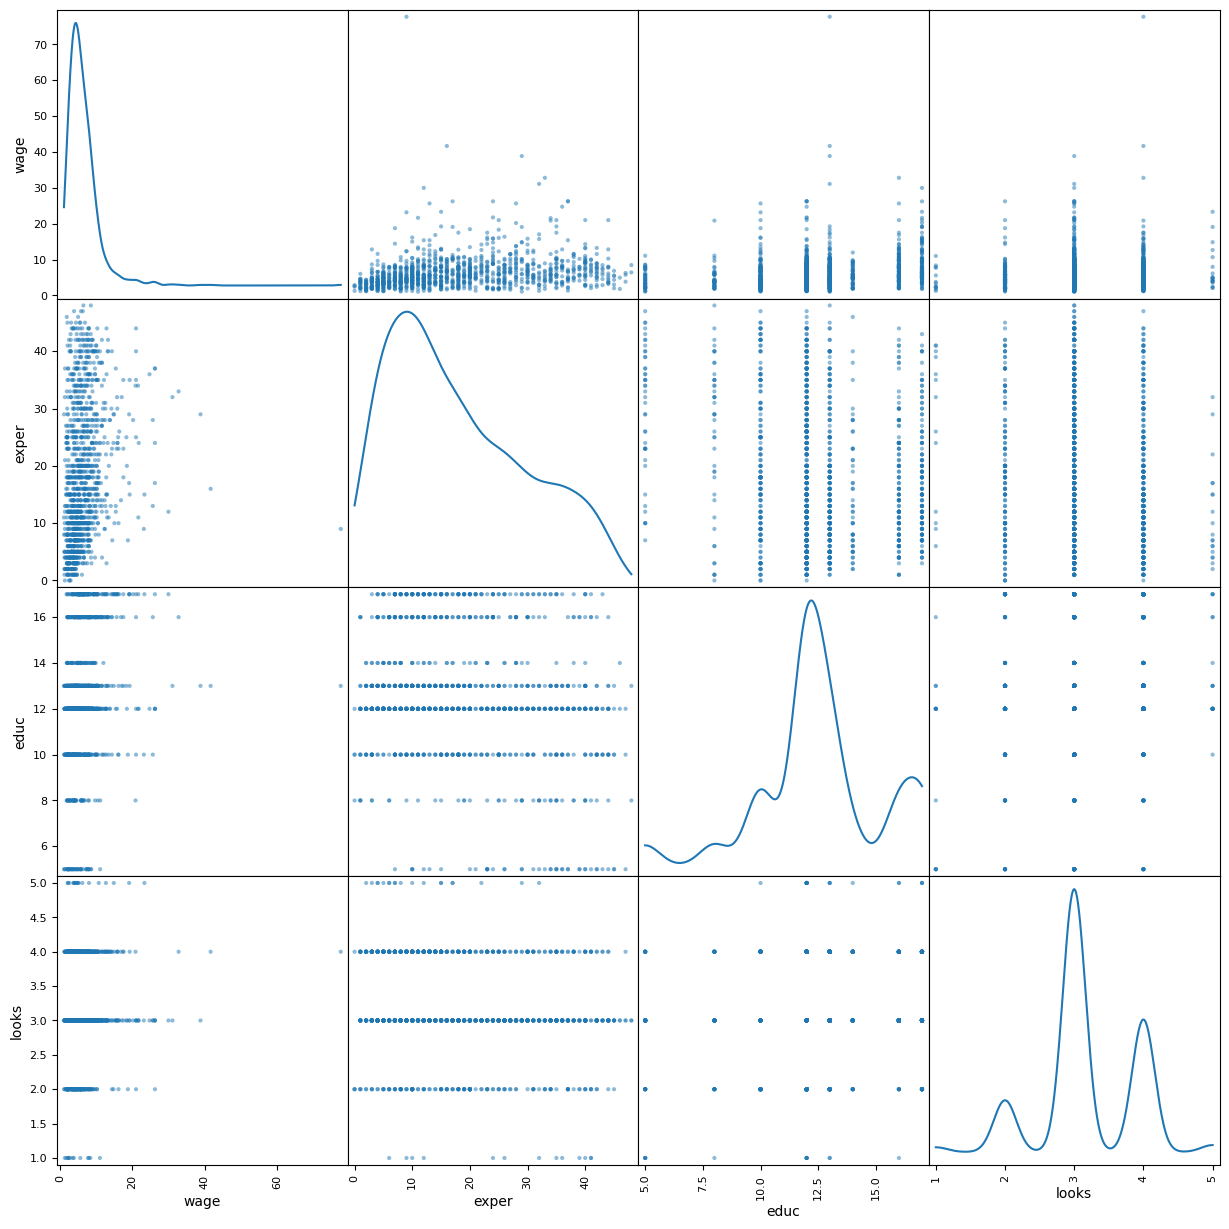

In [42]:
pd.plotting.scatter_matrix(
    df[["wage", "exper", "educ", "looks"]], figsize=(15, 15), diagonal="kde"
)
plt.show()

**За всяка функция можете да изградите отделна хистограма:**

<Axes: >

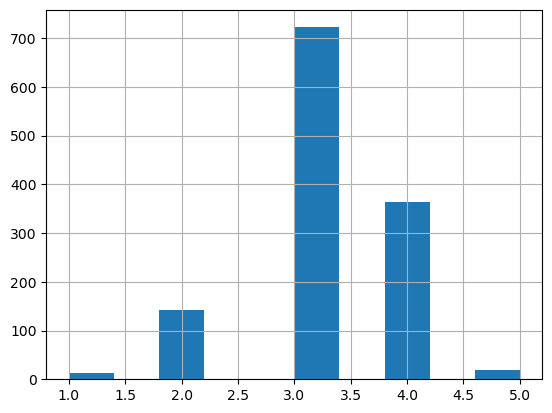

In [43]:
df["looks"].hist()

**Или за всички наведнъж:**

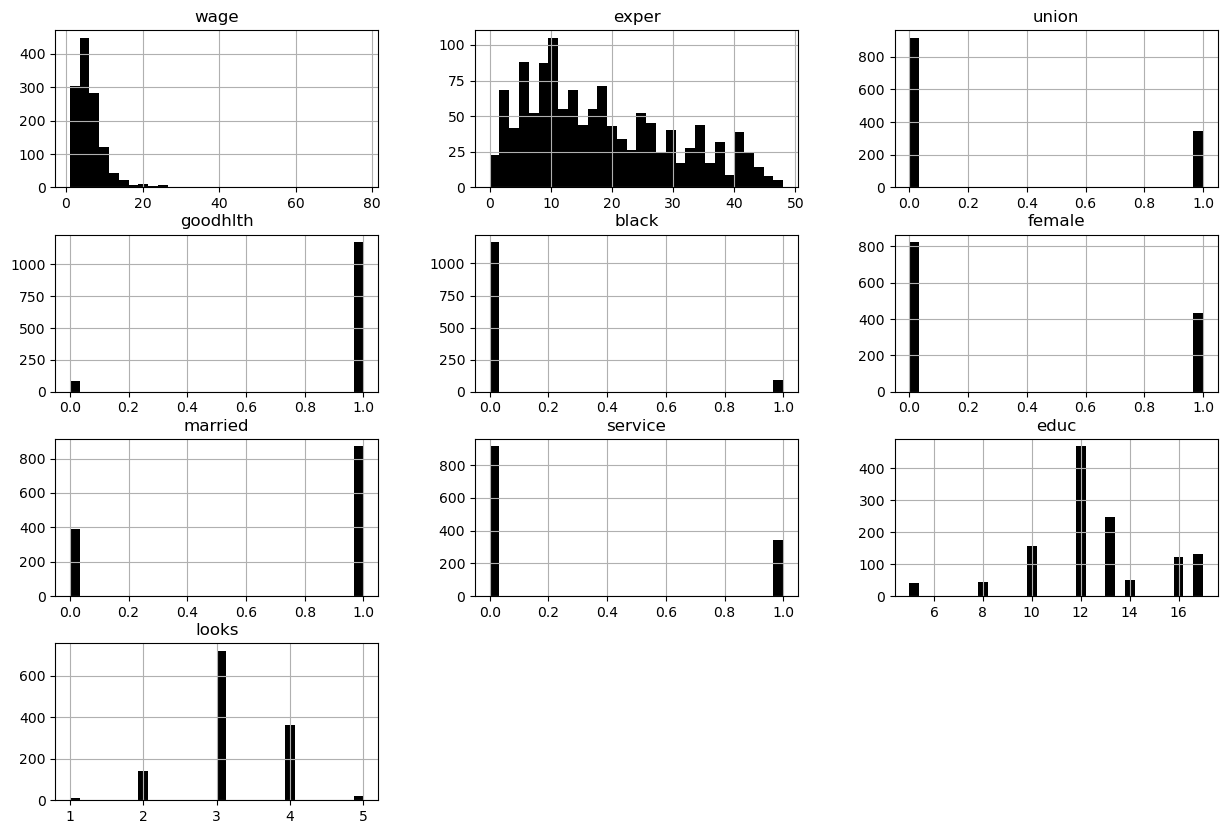

In [44]:
df.hist(color="k", bins=30, figsize=(15, 10))
plt.show()

**box plot** също е полезен. Позволява ви да визуализирате компактно основните характеристики (медиана, долни и горни квартили, минимални и максимални стойности, отклонения) на разпределението на характеристиките.

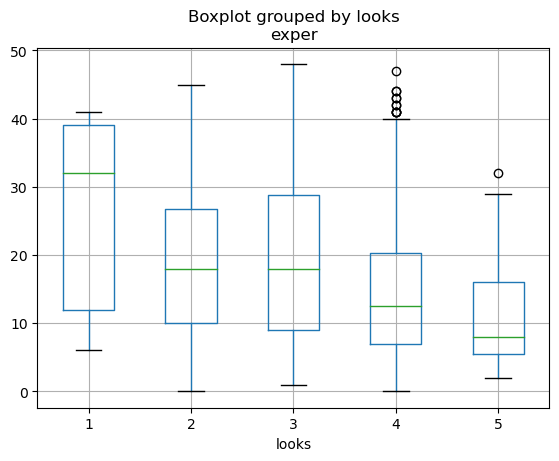

In [45]:
df.boxplot(column="exper", by="looks")
plt.show()

**Можете да направите това, като групирате данните според някоя друга характеристика:**

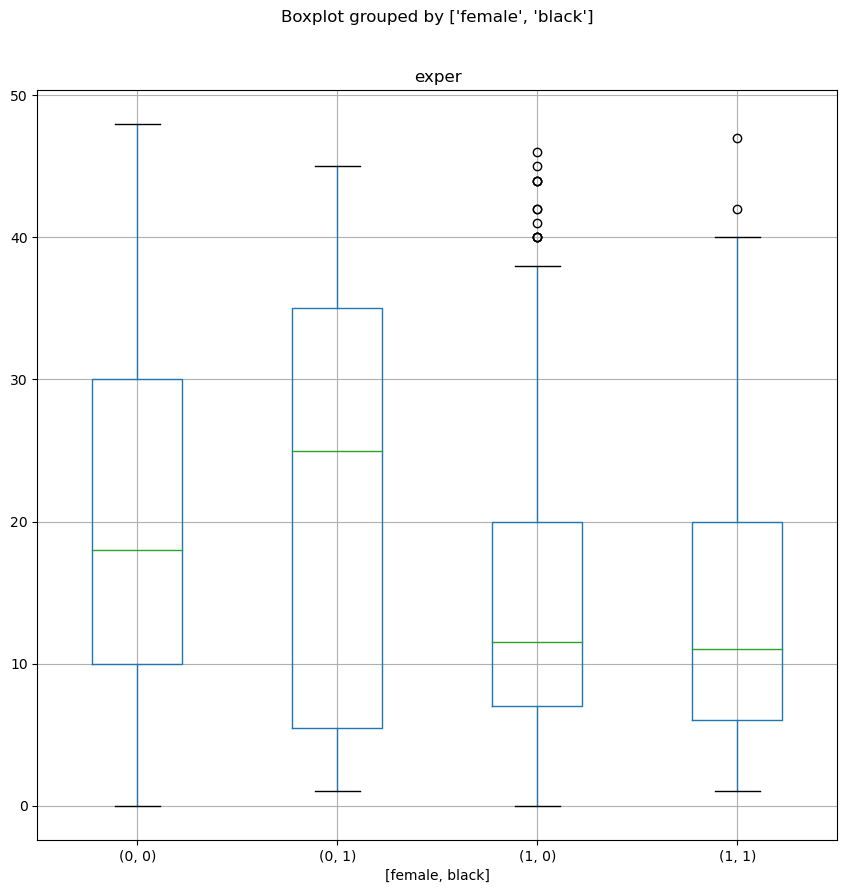

In [46]:
df.boxplot(column="exper", by=["female", "black"], figsize=(10, 10))
plt.show()